<a href="https://colab.research.google.com/github/Hebaehab765/AI4GoodLab/blob/main/MLF_Supervised_Learning_Heba's_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Foundations - **Supervised Learning**


In this notebook we explore two examples of unsupervised learning algorithms.

You can use this notebook in two ways:


1.   Download the notebook and run it locally on your computer (*File -> Download -> Download .ipynb*). This requires setup.
2.   Access and run in **Google Colab**. [*recommended*]
  * To save your changes to the notebook, you can save a copy to your Google Drive (*File -> Save a copy in Drive*).

To run each block of code, click the ▶ button on the top left corner of the cell.


If you are not familiar with coding and Python, here are a few different types of notations you will encounter in the code blocks.


*   Lines starting with # are *comment lines* and are not executed when running the code. They are used to add additional context, section the code or for testing purposes.

  ```python
   ################################
   # This an example of a comment #
   ################################
   ```


*   Lines in the following format are used to import pre-written Python code libraries, called *packages*. Once they are imported, they can be used in our code.

  ```python
  import <package_name>
  import <package_name> as <alias>
  from <package_name> import <object_name>

  ```
* Lines starting with % are *magic commands* exclusive to Ipython/Jupyter or Colab and help customize the notebook or interact with it.

  ```ipython
  %matplotlib inline

  ```

Other lines of code can perform a variety of actions such as store information, initialize ML models, perform training, visualization, and so forth.  You do not need to understand all lines individually. Try to follow the overall high-level process by paying attention to explanations and comments.

# Wine Quality Classification

The below cell does the following

1.   Loads Required Libraries
2.   Loads and prepares the data
3. Displays our data in a dataframe



Our data for this example is about the quality of  wine. We have detailed information about the properties of the wine such as the malic-acid, magensium, ash, etc which are present in the wine. From these properties, the quality of the wine is determined and given a class rating from 0 to 2.

In [ ]:
# Crucial data processing and analysis libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading the modules required to build and evaluate a DT model
from sklearn.tree import DecisionTreeClassifier # The algorithm
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


# Loading the wine dataset from sklearn
from sklearn.datasets import load_wine

# loading data
wine = load_wine()

# There are three key parts to the dataset we care about
#(1) The features(X)
X = wine.data


#(2) The target classes(y)
y = wine.target

df = pd.DataFrame(X, columns=wine['feature_names'])
df['class'] = wine.target


print("Number of rows in the data: " + str(df.shape[0]))
df.sample(10)

Number of rows in the data: 178


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
65,12.37,1.21,2.56,18.1,98.0,2.42,2.65,0.37,2.08,4.60,1.19,2.30,678.0,1
128,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0,1
56,14.22,1.70,2.30,16.3,118.0,3.20,3.00,0.26,2.03,6.38,0.94,3.31,970.0,0
66,13.11,1.01,1.70,15.0,78.0,2.98,3.18,0.26,2.28,5.30,1.12,3.18,502.0,1
55,13.56,1.73,2.46,20.5,116.0,2.96,2.78,0.20,2.45,6.25,0.98,3.03,1120.0,0
110,11.46,3.74,1.82,19.5,107.0,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562.0,1
52,13.82,1.75,2.42,14.0,111.0,3.88,3.74,0.32,1.87,7.05,1.01,3.26,1190.0,0
81,12.72,1.81,2.20,18.8,86.0,2.20,2.53,0.26,1.77,3.90,1.16,3.14,714.0,1
116,11.82,1.47,1.99,20.8,86.0,1.98,1.60,0.30,1.53,1.95,0.95,3.33,495.0,1
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0


We have used a python library to process the data and display it in a dataframe. Below we will highlight the features (X) in green and the target/label (Y) in red. Recall supervised learning requires labels in our dataset.
*   Green highlight = Features
*   Red highlight = Labels


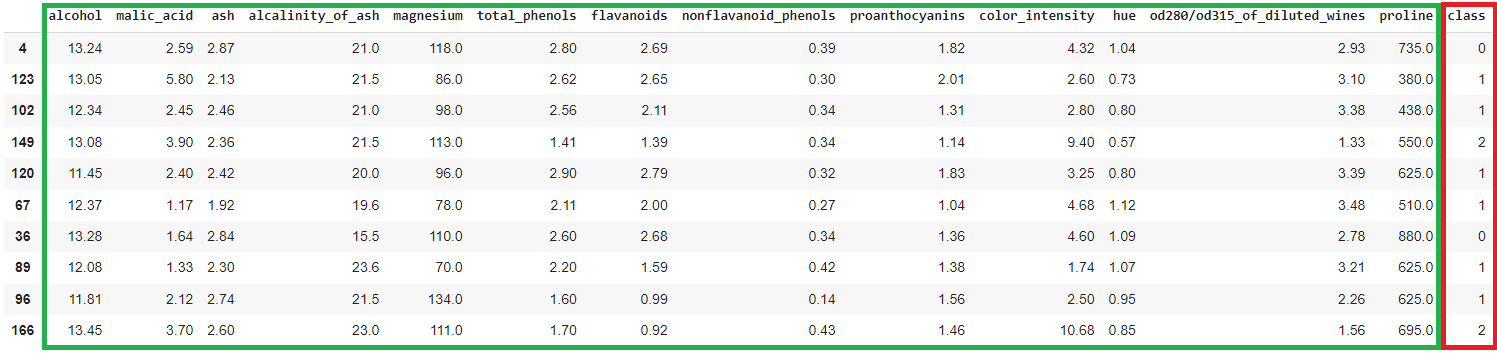

Now we will use our data to train a machine learning model so that the model can predict classes of the wine when we test it with new data

In [ ]:
# Run this code cell to see how the tree is making a binary decision (true or false) at each node of the tree
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

X = wine.data
y = wine.target

# This line below the class types into strings so that its visible on the leaf graphics as the final output
y_2 = [str(x) for x in y]

X_train, X_test, y_train, y_test = train_test_split(X,y_2,test_size=0.2)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In the above code, in the last line, we fit our data onto our model. Again, we have highlighted the features (X) in green and the target/label (Y) in red.

Capture.PNG

We can now visualize the decision tree.

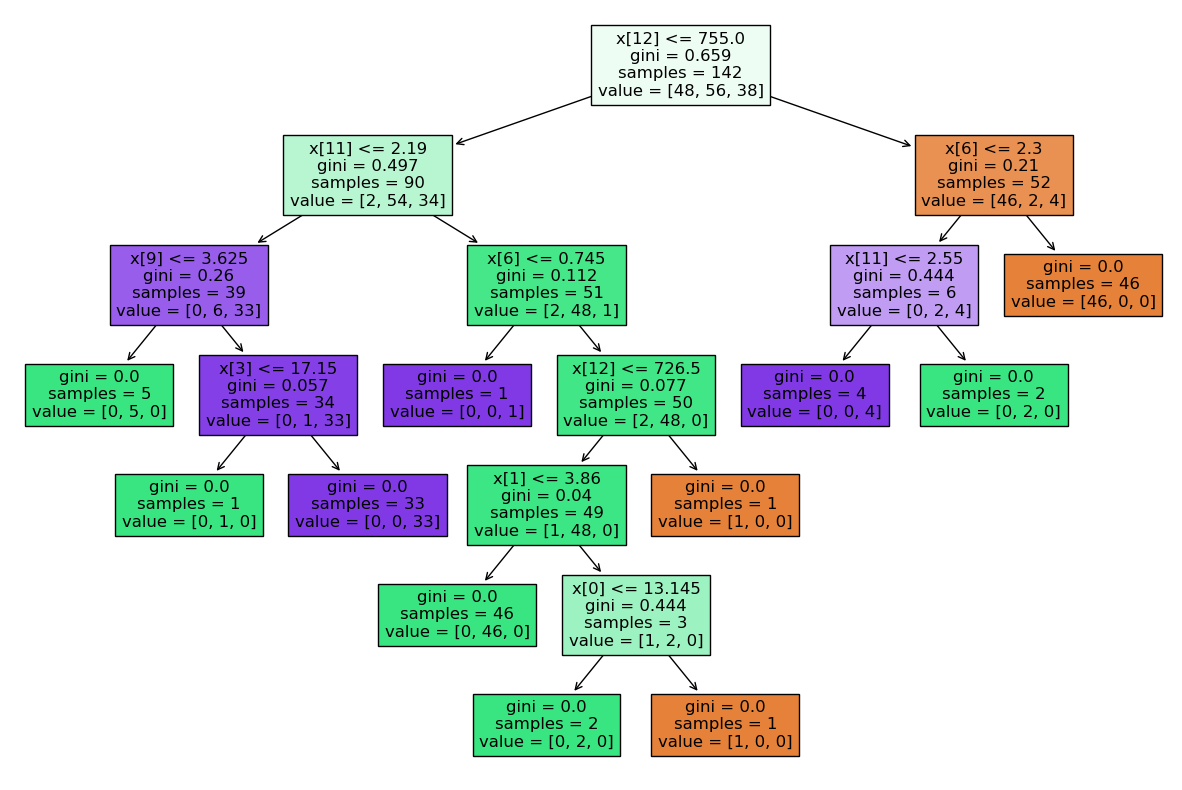

In [ ]:
plt.figure(figsize=(15, 10)) # Resize figure
plot_tree(model, filled=True) # plot the tree
plt.show()

Now, we can predict the class (0, 1, or 2) of a wine by testing with the data about that particular wine. The dataframe below is the wine we will be testing.

In [ ]:
pd.DataFrame(X_test[0].reshape(1,-1), columns=wine['feature_names'])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,13.48,1.67,2.64,22.5,89.0,2.6,1.1,0.52,2.29,11.75,0.57,1.78,620.0


In [ ]:
print("The predicted wine class is: " + str(model.predict(X_test[0].reshape(1,-1))))

The predicted wine class is: ['2']


---

# Cat or Dog?! that is the question

## Looking at the data

Now we will look at a dataset that contains images of cats and dogs.

In [ ]:
import zipfile

!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()


#### Organizing folders
base_dir = './cats_and_dogs_filtered'

--2024-03-07 18:46:55--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 2607:f8b0:4023:c0b::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   151MB/s    in 0.4s    

2024-03-07 18:46:56 (151 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



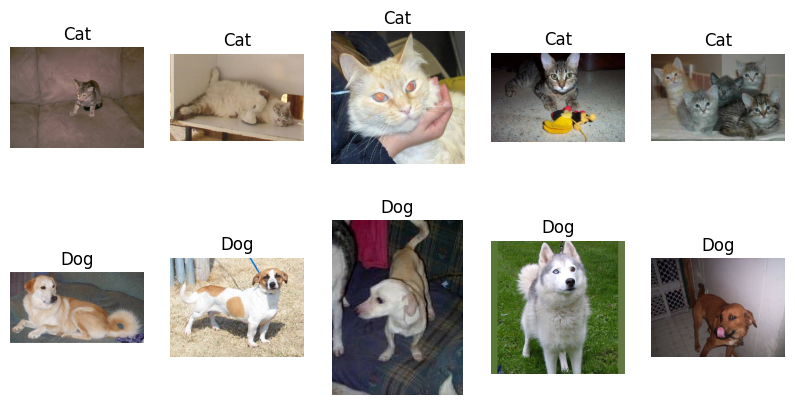

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.src.engine.sequential import training


# Define the paths to the images
PATH = "/content/cats_and_dogs_filtered"
cats_dir = "/content/cats_and_dogs_filtered/train/cats"
dogs_dir = "/content/cats_and_dogs_filtered/train/dogs"

# Get the filenames of the images
cat_files = os.listdir(cats_dir)
dog_files = os.listdir(dogs_dir)

# Display some images and their labels
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    # Load the image
    if i < 5:
        img = cv2.imread(os.path.join(cats_dir, cat_files[i]))
        ax.set_title("Cat")
    else:
        img = cv2.imread(os.path.join(dogs_dir, dog_files[i-5]))
        ax.set_title("Dog")
    # Display the image
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.axis('off')
plt.show()

Below we will highlight the features (X) in green and the label (Y) in red as above.

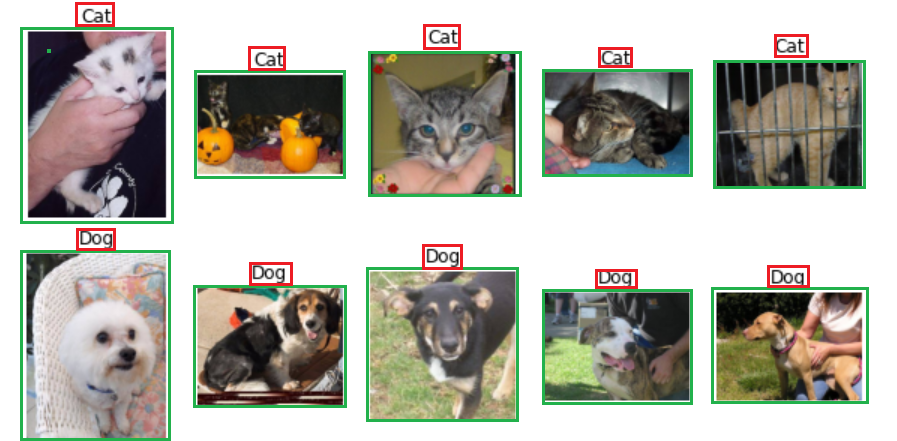

Even though we are using image data, the algorithm will use a numerical representation of the images to train the model.
Each image consists of many pixels and each pixel has a color that can be identified in an **RGB** (Red, Green, Blue) format.

For example the blue color below is RGB(51, 153, 255) and therefore can be represented by 3 values. (Note that these values are integers in 0 to 255 range.)


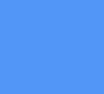


So if we take a look at the numerical representation of an image we can see that it has 3 dimensions. The first two represent the width and length of the image in pixels and and the last one gives the RGB values for each pixel.

In [ ]:
print(f'The shape of the array is {img.shape} and all values are in range {img.min()} to {img.max()}')
print(img)

The shape of the array is (335, 344, 3) and all values are in range 0 to 255
[[[154 158 147]
  [156 160 149]
  [160 164 153]
  ...
  [171 132  87]
  [148 108  66]
  [123  83  41]]

 [[162 166 155]
  [159 163 152]
  [155 159 148]
  ...
  [171 132  88]
  [149 109  67]
  [124  84  42]]

 [[157 160 151]
  [154 157 148]
  [149 152 143]
  ...
  [172 133  89]
  [150 110  68]
  [125  84  45]]

 ...

 [[ 72  94 106]
  [ 79 101 113]
  [ 86 108 120]
  ...
  [ 73  91  98]
  [ 74  92  99]
  [ 74  92  99]]

 [[ 72  94 106]
  [ 78 100 112]
  [ 85 107 119]
  ...
  [ 72  90  97]
  [ 71  89  96]
  [ 68  86  93]]

 [[ 84 108 120]
  [ 84 108 120]
  [ 86 110 122]
  ...
  [ 70  86  92]
  [ 71  87  93]
  [ 71  87  93]]]


## Let's set up training and test sets!

We split the dataset into two parts: training set and test set. As the names suggest, we use only the training set to train a model and test then evaluate its performance on the test set.

In [ ]:
# Train and test paths
train_dir = os.path.join(PATH, 'train')
test_dir = os.path.join(PATH, 'validation')
BATCH_SIZE = 32 # We feed the data to the model in batches of 32
IMG_SIZE = (160, 160)

# load the training dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)
# load the test dataset
test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                           shuffle=True,
                                                           batch_size=BATCH_SIZE,
                                                           image_size=IMG_SIZE)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
# This section helps speed up the process of loading data by buffering
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

## Deep Neural Network


For our model, we will be using a
[Convolutional Neural Network (CNN)](https://en.wikipedia.org/wiki/Convolutional_neural_network). CNNs are a type of deep neural network that performs very well for image related tasks.

Instead of training a model from scratch, we will be using an already trained base model called mobileNetV2 as a building block. There are many such pre-trained models available for different applications.

We then add new layers on top of this base and train the resulting network on our specific dataset. This approach is called "Transfer Learning" and can help us get better results in a shorter amount of training time.

In [ ]:
# Here we use a ready-made model that was previously trained a large dataset of images
BASE_MODEL_TYPE = tf.keras.applications.mobilenet_v2 # Other options: mobilenet_v3, VGG16, VGG19
base_model = BASE_MODEL_TYPE.MobileNetV2(input_shape=IMG_SIZE+(3,),
                                         include_top=False,
                                         weights='imagenet')
base_model.trainable = False # we do not further train the base model

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
# Then we add new layers to our base model
# to specifically train on our current cat/dog dataset
inputs = tf.keras.Input(shape=IMG_SIZE+(3,)) # input layer
# this layer processes the input to be usable by the base model
x = BASE_MODEL_TYPE.preprocess_input(inputs)
# base model - training=False means we won't be modifying this section in training
x = base_model(x, training=False)
# New layers - these layers will be modified during the training
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(1)(x)
#################################################################
model = tf.keras.Model(inputs, outputs) # this line puts everything together in "model"

In [ ]:
# we can see a summary of each layer
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, 160, 160, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 160, 160, 3)       0         
 da)                                                             
                                                                 
 mobilenetv2_1.00_160 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                     

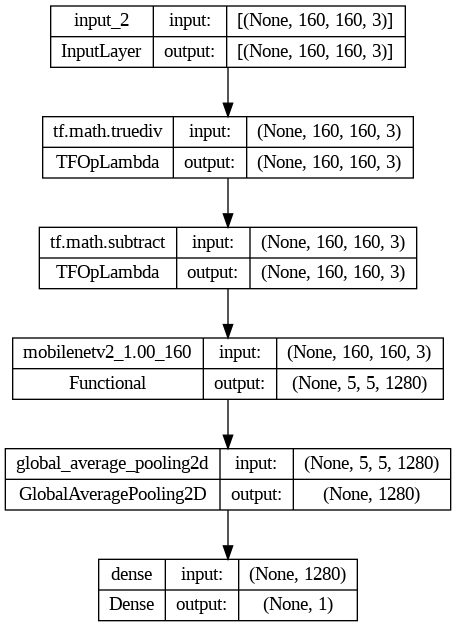

In [ ]:
# this is a simple visualization of the model. The layers are as follows:
# Input layer -> the next two layers process the input
# -> base model -> the next two layers are new layers we added
tf.keras.utils.plot_model(model, show_shapes=True)

## Training

Having defined the model's architecture, we configure the training details.

In [ ]:
# Here we configure the model for training
learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0, name='accuracy')])

Before we do any training, let's see how is the model performing. As you will see, model performs very poorly with a very low accuracy.

In [ ]:
init_loss, init_accuracy = model.evaluate(test_dataset)

32/32 [==============================] - 19s 555ms/step - loss: 0.9210 - accuracy: 0.4650


The next cell will perform training and stores the results. Based on the number of iterations, this will take a while.

As the training progresses, you can see the loss decrease and accuracy increase. This accuracy refers to how the model performs on the training set, whereas val_accuracy refers to its performance on the test set. Pay attention to how these numbers change throughout the iterations.

Feel free experiment with the number of iterations.

In [ ]:
# Now we fit the model to our training data for 20 iterations/epochs
# And we observe the model accuracy on the test data
# The term "validation" here can be treated as "test" but
# in a more comprehensive experiment, we may split the data into train, validation and test sets.
n_epochs = 20
history = model.fit(train_dataset,
                    epochs=n_epochs,
                    validation_data=test_dataset)

Epoch 1/20
63/63 [==============================] - 60s 904ms/step - loss: 0.7133 - accuracy: 0.5830 - val_loss: 0.5469 - val_accuracy: 0.7400
Epoch 2/20
63/63 [==============================] - 50s 788ms/step - loss: 0.4568 - accuracy: 0.8060 - val_loss: 0.3761 - val_accuracy: 0.8670
Epoch 3/20
63/63 [==============================] - 54s 852ms/step - loss: 0.3255 - accuracy: 0.8975 - val_loss: 0.2814 - val_accuracy: 0.9160
Epoch 4/20
63/63 [==============================] - 49s 783ms/step - loss: 0.2503 - accuracy: 0.9375 - val_loss: 0.2238 - val_accuracy: 0.9450
Epoch 5/20
63/63 [==============================] - 54s 857ms/step - loss: 0.2038 - accuracy: 0.9540 - val_loss: 0.1868 - val_accuracy: 0.9520
Epoch 6/20
63/63 [==============================] - 55s 861ms/step - loss: 0.1729 - accuracy: 0.9595 - val_loss: 0.1614 - val_accuracy: 0.9600
Epoch 7/20
63/63 [==============================] - 54s 864ms/step - loss: 0.1513 - accuracy: 0.9630 - val_loss: 0.1429 - val_accuracy: 0.9680

Here we plot the results of the training for both the training and test sets. As you can see after a number of iterations, the training accuracy still increases, while the test accuracy pretty much stays the same. Can you think of a reason why?

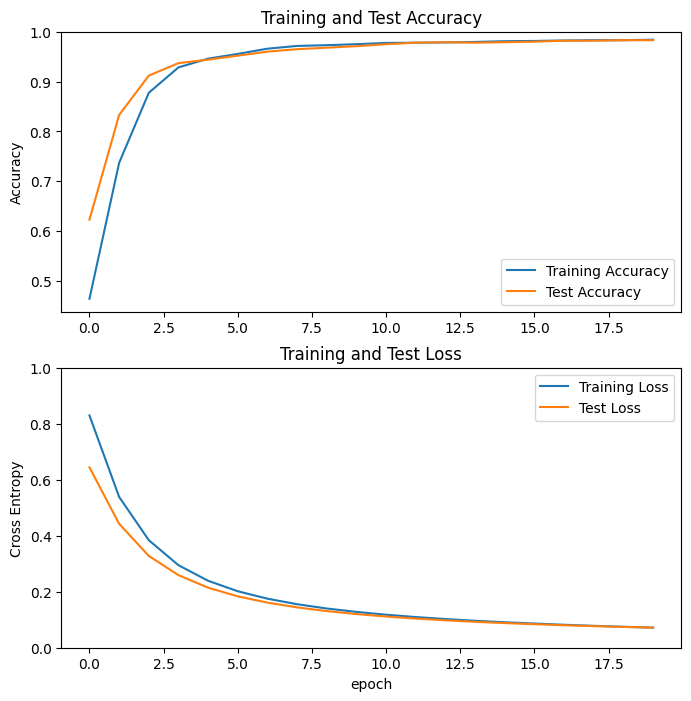

In [ ]:
# plot loss and accuracy for the test and training sets
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Test Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Test Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Test Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Test Loss')
plt.xlabel('epoch')
plt.show()

## Prediction

Now it's time to put our newly trained model to use. After running this cell, you use the button "choose files" to see how the model classifies an image of your choosing.

Try to see if you can find an image that tricks the model into making an incorrect prediction!

In [ ]:
import numpy as np

from google.colab import files
import keras.utils as image

uploaded=files.upload()

for fn in uploaded.keys():

  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(160, 160))
  plt.figure(figsize=(5, 5))
  plt.imshow(img)
  plt.show()

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")


Saving strands.png to strands.png


NameError: name 'plt' is not defined

# Some things to think about ...

* With a large enough neural network and a lot more iterations, we achieve a near 100% accuracy on the training data? Is such an outcome ideal? How do you think that would affect test accuracy?
* We have a equal amount of images of cats and dogs. What if the dataset had way more pictures of cats than dogs?
* What if a new species of a dog is discovered? Would the model still work? Why not?